In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

In [2]:
boston = load_boston()

C:\Users\HP\anaconda3\envs\torch_myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

## loading the dataset an applying MinMaxscaler

In [3]:
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target, columns= ['target'])

In [4]:
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()
df_scaled = std_scaler.fit_transform(df_x)

## splitting the dataset 60% train 20% test and 20% eval

In [5]:
x_train , x_testVal ,y_train , y_testVal =train_test_split(df_scaled,df_y,test_size=0.4)
x_test , x_val ,y_test , y_val =train_test_split(x_testVal,y_testVal,test_size=0.5)

In [6]:
x_train.shape, x_test.shape, x_val.shape

((303, 13), (101, 13), (102, 13))

In [7]:
lr =LinearRegression()
lr =lr.fit(x_train,y_train)

ptest = lr.predict(x_test)
testMSE= mean_squared_error(y_test,ptest)
testscore=r2_score(y_test, ptest)

ptrain  = lr.predict(x_train)
trainMSE=np.sqrt(mean_squared_error(y_train,ptrain))
trainscore =r2_score(y_train,ptrain)

peval  = lr.predict(x_val)
valMSE= np.sqrt(mean_squared_error(y_val,peval))
valscore=r2_score(y_val,peval)

### applying linear regression on the train test and evaluation sets we get that the train has the least RMSE 

In [8]:
trainMSE, testMSE ,valMSE

(4.98444778244447, 17.446741925782124, 4.389959767824654)

### testing 10 diffrent degrees and calculating the MSE to get the best degree using cross valdiation set

In [9]:
degrees = [1,2,3,4,5,6,7,8,9,10]

In [10]:
y_val_pred,y_train_pred =[], []
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    y_val_pred.append(model.predict(x_val))
    y_train_pred.append(model.predict(x_train))

In [14]:
val_errors,train_errors,val_Scores =[],[],[]
for i, degree in enumerate(degrees):
    val_r2 = r2_score(y_val, y_val_pred[i])
    val_r1 = mean_squared_error(y_val, y_val_pred[i])
    val_errors.append(val_r1)  
    val_Scores.append(val_r2)
    train_r1 = mean_squared_error(y_train, y_train_pred[i])
    train_errors.append(train_r1)


### plotting degree against MSE of he train and crossvalidation results and we can say that the least error is from degree 1
### the largest error is degree 2 from the cross validation MSE

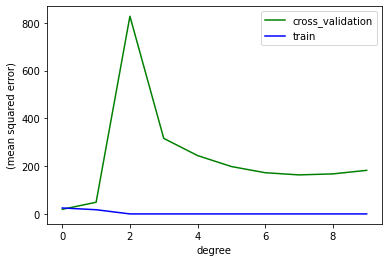

In [15]:
plt.plot(np.arange(10), val_errors, color='green', label='cross_validation')
plt.plot(np.arange(10), train_errors, color='blue', label='train')
plt.ylabel('(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper right')

### cross validation on degree one gives 72% accuracy

In [16]:
best_degree = np.argmin(min(val_errors))
print('degree with minimum error is: ', degrees[best_degree])
print('score: ',val_Scores[best_degree]*100)
print('error value: ',min(val_errors))

degree with minimum error is:  1
score:  72.35277636243879
error value:  19.271746763119094


### using the best degree on the test set we get 78% accuracy with means the model preforms good on new data with error of 17

In [17]:
model = make_pipeline(PolynomialFeatures(degrees[best_degree]), LinearRegression())
model.fit(x_train, y_train)
y_predict = (model.predict(x_test))
test_r2 = r2_score(y_test, y_predict)
test_r1 = mean_squared_error(y_test, y_predict)
print('score: ',test_r2*100)
print('error value: ',test_r1)

score:  78.14103619414503
error value:  17.446741925782124


#### lasso regression

In [219]:
alphas = [1e-1, 1e-2,1e-3,0,0.1,0.2,0.3,0.5,.8,1,2,3,4,5,6,10,11,12,15,20,30,40,50,100,200,300,400,500,550]
y_test_lasso, y_val_lasso, y_train_lasso =[[0]*len(alphas)],[[0]*len(alphas)],[[0]*len(alphas)]
for a in range(len(alphas)):
    est = make_pipeline(PolynomialFeatures(1), Lasso(alpha=alphas[a]))
    est.fit(x_train, y_train)
    y_val_lasso[0][a]=(est.predict(x_val))
    y_train_lasso[0][a]=(est.predict(x_train))  

C:\Users\HP\anaconda3\envs\torch_myenv\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\HP\anaconda3\envs\torch_myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\HP\anaconda3\envs\torch_myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.599e+03, tolerance: 2.557e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemente

In [220]:
val_errors_lasso,train_errors_lasso , val_scores_lasso=[],[],[]
for i in range(len(alphas)):
    val_r1_lasso = mean_squared_error(y_val, y_val_lasso[0][i])
    val_r2_lasso = r2_score(y_val,y_val_lasso[0][i])
    val_scores_lasso.append(val_r2_lasso)
    val_errors_lasso.append(val_r1_lasso)   
    train_r1_lasso = mean_squared_error(y_train, y_train_lasso[0][i])
    train_errors_lasso.append(train_r1_lasso)


## from the alpha graph with the MSE we can see that the alpha ramges tend to underfit

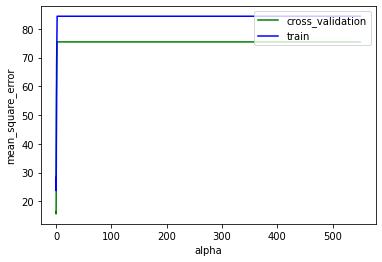

In [221]:
plt.plot(alphas, val_errors_lasso, color='green', label='cross_validation')
plt.plot(alphas, train_errors_lasso, color='blue', label='train')
plt.ylabel('mean_square_error')
plt.xlabel('alpha')
plt.legend(loc='upper right')

### the best alpha with the lowest degree is 0.1 with accuracy of 78% on the cross validation set which is better than linear regression without regularization

In [222]:
best_degree = min(val_errors_lasso)
print('alpha with minimum error is: ', alphas[np.argmin(min(val_errors_lasso))])
print('score: ',val_scores_lasso[np.argmin(min(val_errors_lasso))]*100)
print('error value: ',min(val_errors_lasso))

alpha with minimum error is:  0.1
score:  78.20752972147804
error value:  15.656258461740144


### the test set gives a worse acuraccy than the test set with just inear regression

In [223]:
model = make_pipeline(PolynomialFeatures(1), Lasso(alpha=alphas[np.argmin(min(val_errors_lasso))]))
model.fit(x_train, y_train)
y_predict_lasso = (model.predict(x_test))
test_r2_lasso = r2_score(y_test, y_predict_lasso)
test_r1_lasso = mean_squared_error(y_test, y_predict_lasso)
print('score: ',test_r2_lasso *100)
print('error value: ',test_r1_lasso)

score:  70.80333421568399
error value:  27.293107287061126


#### ridge regression

In [224]:
alphas = [1e-1, 1e-2,1e-3,0,0.1,0.2,0.3,0.5,1,2,3,4,5,6,10,20,30,40,50,100,200,300,400,500,600,1000]
y_test_ridge, y_val_ridge, y_train_ridge =[[0]*len(alphas)],[[0]*len(alphas)],[[0]*len(alphas)]
for a in range(len(alphas)):
    est = make_pipeline(PolynomialFeatures(1), Ridge(alpha=alphas[a]))
    est.fit(x_train, y_train)
    y_val_ridge[0][a]=(est.predict(x_val))
    y_train_ridge[0][a]=(est.predict(x_train))  

In [225]:
val_errors_ridge,train_errors_ridge , val_scores_ridge=[],[],[]
for i in range(len(alphas)):
    val_r1_ridge = mean_squared_error(y_val, y_val_ridge[0][i])
    val_r2_ridge = r2_score(y_val,y_val_ridge[0][i])
    val_scores_ridge.append(val_r2_ridge)
    val_errors_ridge.append(val_r1_ridge)   
    train_r1_ridge = mean_squared_error(y_train, y_train_ridge[0][i])
    train_errors_ridge.append(train_r1_ridge)


### also applying ridge regression one can say that the algorithm also underfit because of the large range for alphas

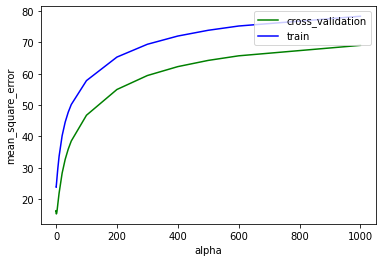

In [226]:
plt.plot(alphas, val_errors_ridge, color='green', label='cross_validation')
plt.plot(alphas, train_errors_ridge, color='blue', label='train')
plt.ylabel('mean_square_error')
plt.xlabel('alpha')
plt.legend(loc='upper right')

### seletting the best alpha based on the cross validation MSE we get also 0.1 with accuracy of 78%

In [227]:
best_degree = min(val_errors_ridge)
a =alphas[np.argmin(min(val_errors_ridge))]
print('degree with minimum error is: ', alphas[np.argmin(min(val_errors_ridge))])
print('score: ',val_scores_ridge[np.argmin(min(val_errors_ridge))]*100)
print('error value: ',min(val_errors_ridge))

degree with minimum error is:  0.1
score:  78.7116939432431
error value:  15.230395115955886


### applying the alpha of .1 with ridge regression on the test set we get 74% accuracy better than lasso with 0.1

In [228]:
model = make_pipeline(PolynomialFeatures(1), Ridge(alpha=a))
model.fit(x_train, y_train)
y_predict_ridge = (model.predict(x_test))
test_r2_ridge = r2_score(y_test, y_predict_ridge)
test_r1_ridge = mean_squared_error(y_test, y_predict_ridge)
print('score: ',test_r2_ridge *100)
print('error value: ',test_r1_ridge)

score:  74.38500595069829
error value:  23.944952684308785
